In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open(r"C:\Users\johno\Downloads\P74-Project-5\Project 5\traffic-signs-data\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open(r"C:\Users\johno\Downloads\P74-Project-5\Project 5\traffic-signs-data\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(r"C:\Users\johno\Downloads\P74-Project-5\Project 5\traffic-signs-data\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

37

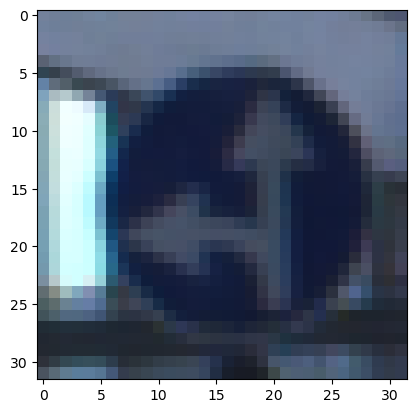

In [11]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

13

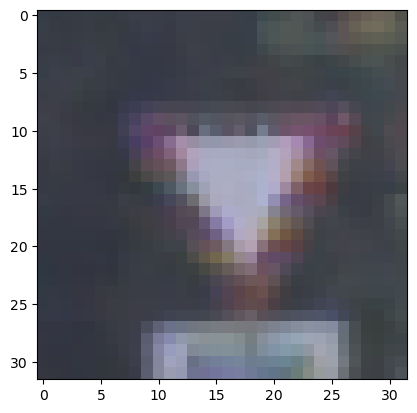

In [12]:
i = 2436
plt.imshow(X_test[i])
y_test[i]

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_test_gray.shape

(12630, 32, 32, 1)

In [17]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [18]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [19]:
X_train_gray_norm

array([[[[-0.77864583],
         [-0.77083333],
         [-0.77864583],
         ...,
         [-0.79947917],
         [-0.79166667],
         [-0.80729167]],

        [[-0.77604167],
         [-0.765625  ],
         [-0.77604167],
         ...,
         [-0.796875  ],
         [-0.80729167],
         [-0.80989583]],

        [[-0.78125   ],
         [-0.77083333],
         [-0.77864583],
         ...,
         [-0.73958333],
         [-0.73958333],
         [-0.734375  ]],

        ...,

        [[-0.81510417],
         [-0.81510417],
         [-0.8125    ],
         ...,
         [-0.40625   ],
         [-0.38020833],
         [-0.390625  ]],

        [[-0.80208333],
         [-0.79947917],
         [-0.796875  ],
         ...,
         [-0.40104167],
         [-0.39322917],
         [-0.390625  ]],

        [[-0.79166667],
         [-0.79166667],
         [-0.796875  ],
         ...,
         [-0.421875  ],
         [-0.40104167],
         [-0.38802083]]],


       [[[-0.76041667],


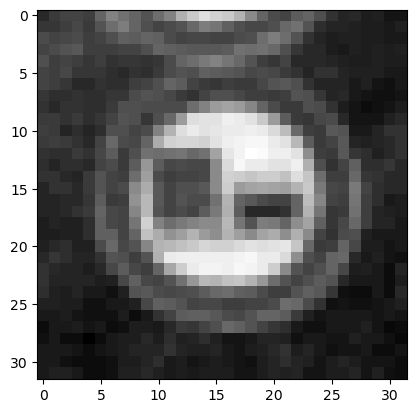

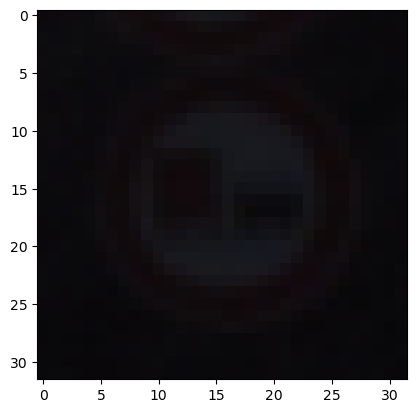

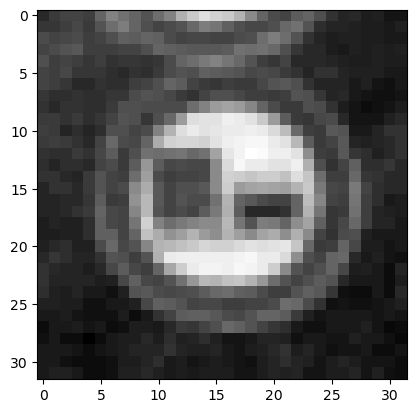

In [20]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'grey')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'grey')

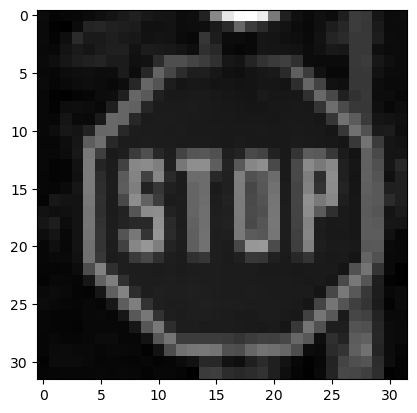

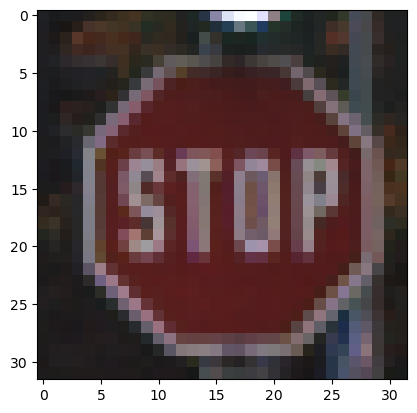

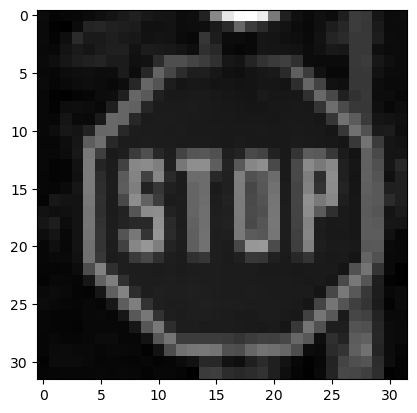

In [21]:
i = 456
plt.imshow(X_test_gray[i].squeeze(), cmap = 'grey')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'grey')

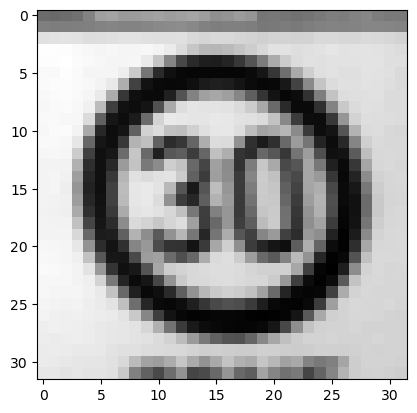

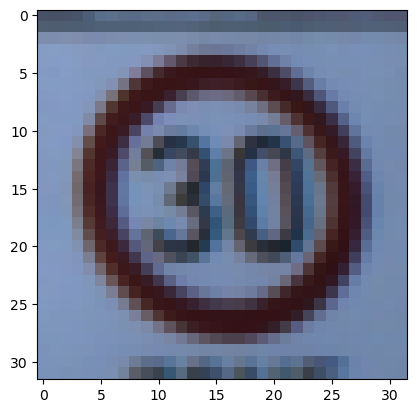

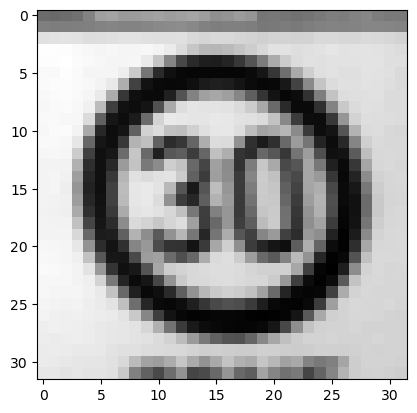

In [22]:
i = 536
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'grey')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'grey')

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [24]:
cnn_model = Sequential()


cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))  

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))  

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

C:\Users\johno\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.optimizers import Adam

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  
    metrics=['accuracy']
)


In [26]:
history = cnn_model.fit(X_train_gray_norm,y_train,batch_size=500, epochs = 50, verbose = 1, validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1257 - loss: 3.3772 - val_accuracy: 0.3161 - val_loss: 2.4712
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5015 - loss: 1.7915 - val_accuracy: 0.5878 - val_loss: 1.3785
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7279 - loss: 0.9683 - val_accuracy: 0.7048 - val_loss: 1.0151
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8106 - loss: 0.6858 - val_accuracy: 0.7612 - val_loss: 0.8336
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8564 - loss: 0.5294 - val_accuracy: 0.7866 - val_loss: 0.7559
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8883 - loss: 0.4112 - val_accuracy: 0.7934 - val_loss: 0.7263
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9028 - loss: 0.3667 - val_accuracy: 0.8073 - val_loss: 0.6844
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9180 - loss: 0.3100 - val_accuracy: 0.8175 - v

In [27]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193,535 (756.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 129,024 (504.00 KB)

In [28]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 1.1871
Test Accuracy: 0.8600950241088867


In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

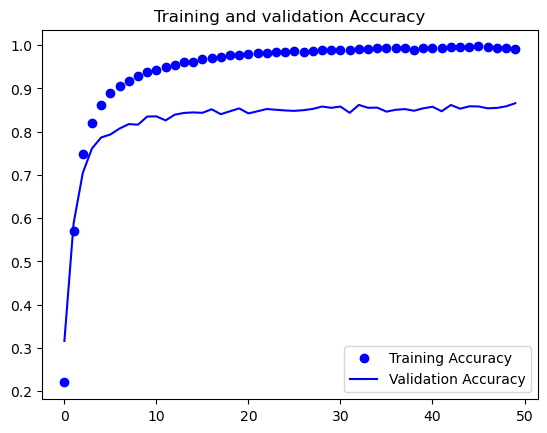

In [31]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

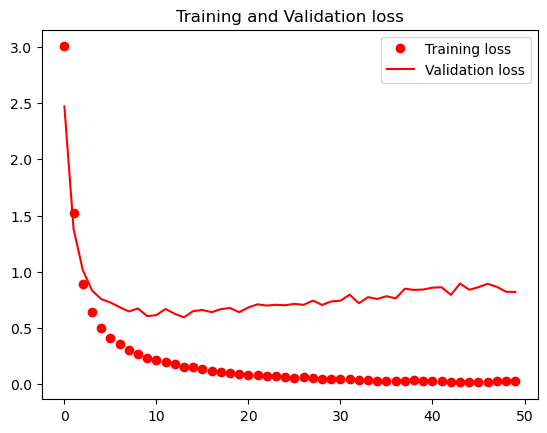

In [32]:
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [36]:
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=1)
y_true = y_test


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 15,  45,   0, ...,   0,   0,   0],
       [  8, 661,  28, ...,   0,   0,   0],
       [  0,  32, 684, ...,   0,   0,   0],
       ...,
       [  0,   2,   0, ...,  37,   0,   0],
       [  0,   0,   0, ...,   0,  45,   0],
       [  0,   0,   0, ...,   0,  26,  60]], dtype=int64)

<Axes: >

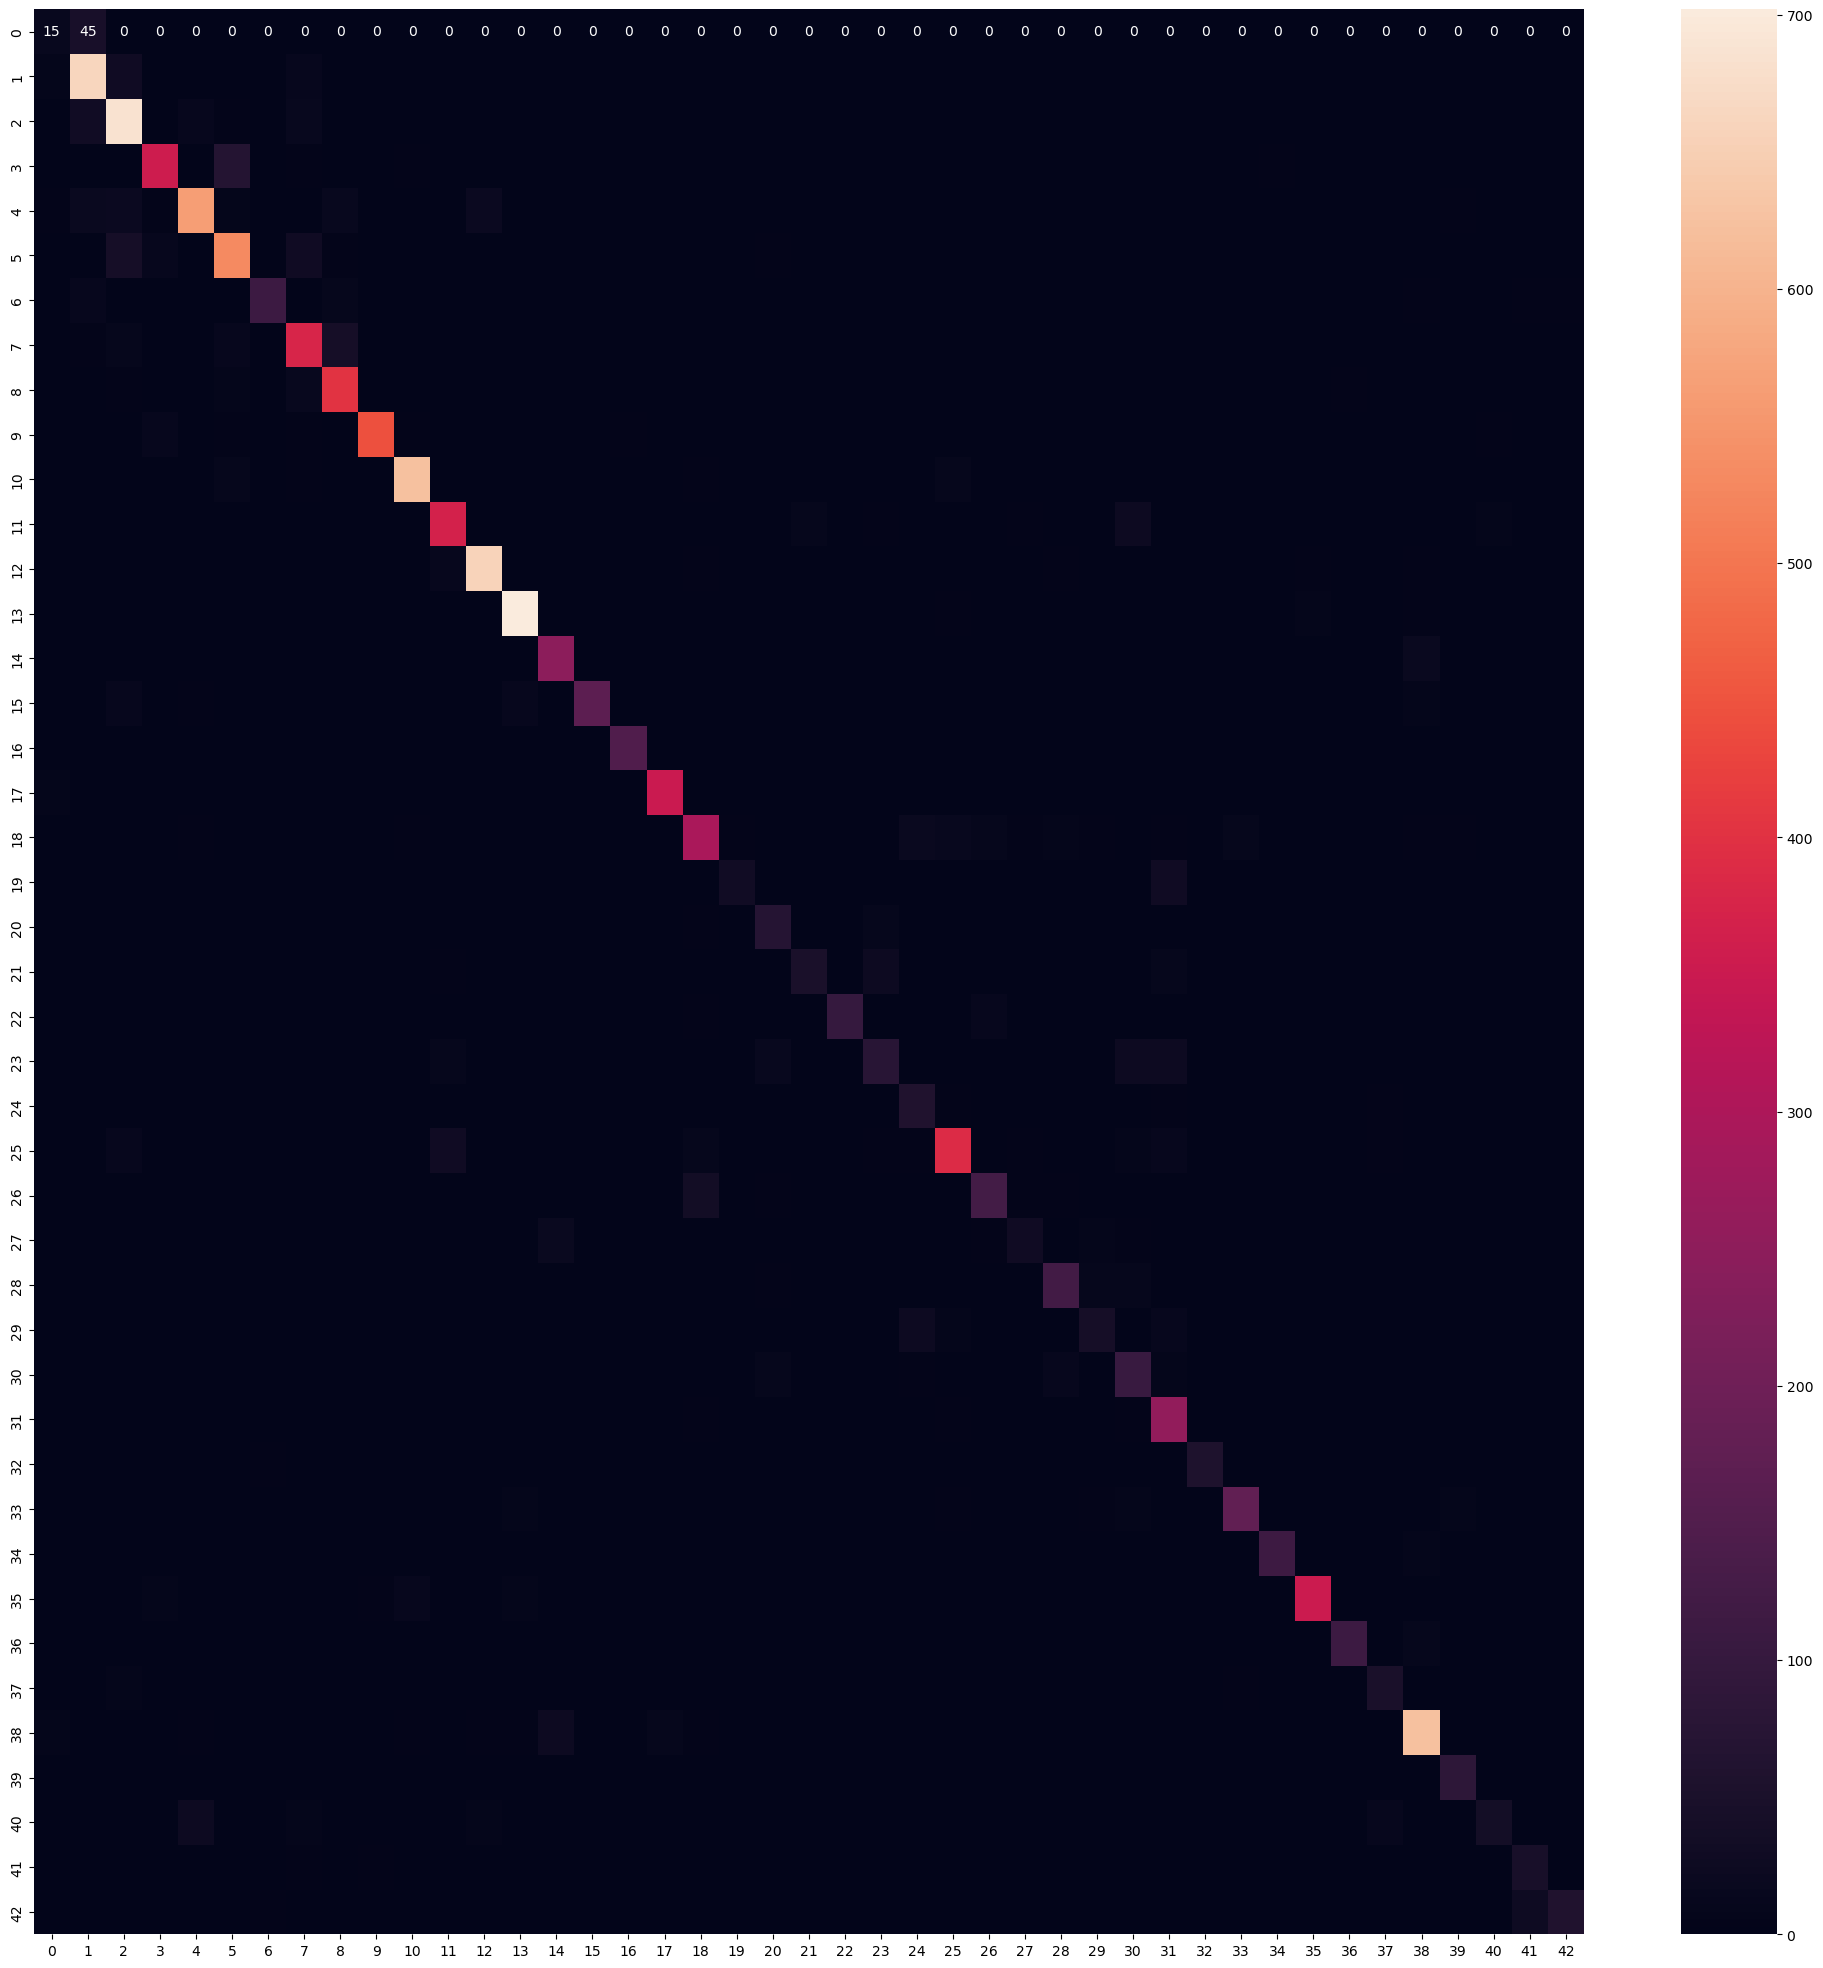

In [41]:
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

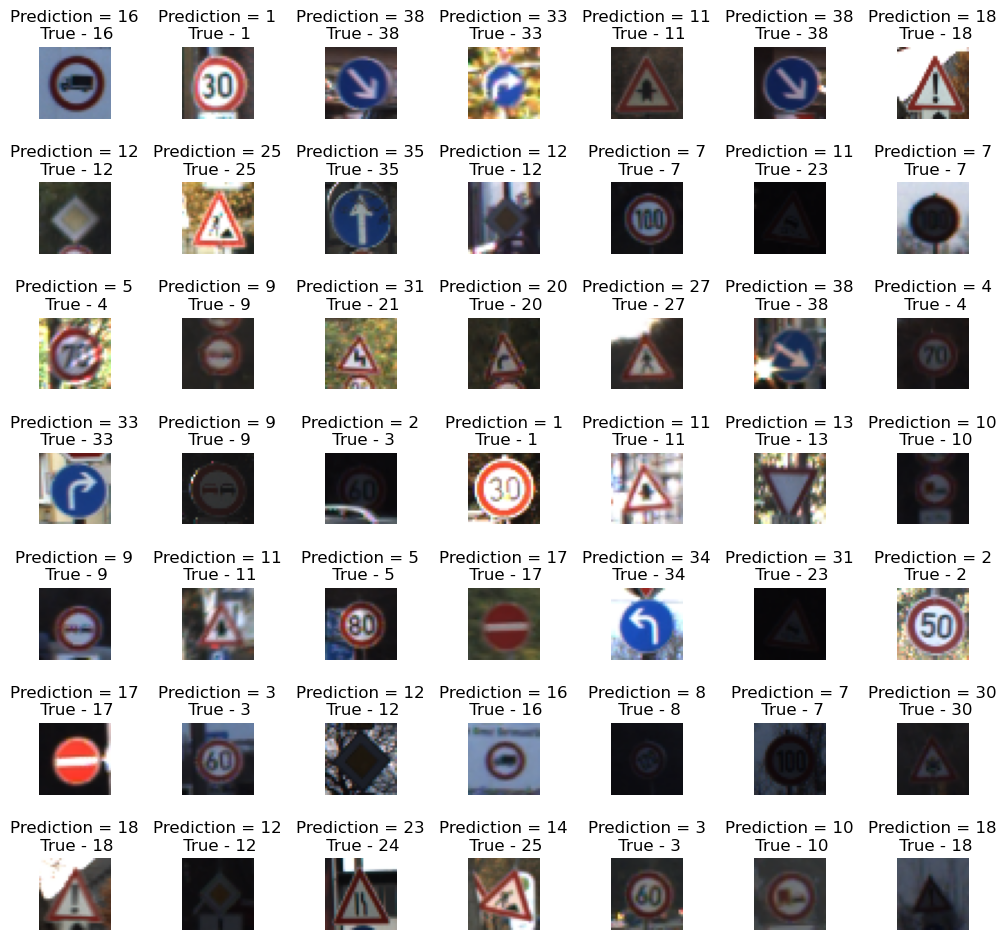

In [44]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True - {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)
